# 02_03_numpycompute.ipynb -  Matrix operations with NumPy

In [6]:
import math

import numpy as np
import matplotlib.pyplot as pp

**Poisson equation**:

$$\frac{\partial^2 \phi(x,y)}{\partial x^2} + \frac{\partial^2 \phi(x,y)}{\partial y^2} = 0$$

**Finite-difference representation of second derivatives:**

$$\frac{\partial^2 \phi(x_i,y_j)}{\partial x^2} + \frac{\partial^2 \phi(x_i,y_j)}{\partial y^2} \simeq
\phi(x_{i-1},y_j) + \phi(x_{i+1},y_j) + \phi(x_i,y_{j-1}) + \phi(x_i,y_{j+1}) - 4 \phi(x_i,y_j)$$

In [7]:
n = 64
phi = np.zeros((n,n), 'd')  # 'd' is shorthand for np.float64

In [8]:
phi[-1,:] = 1

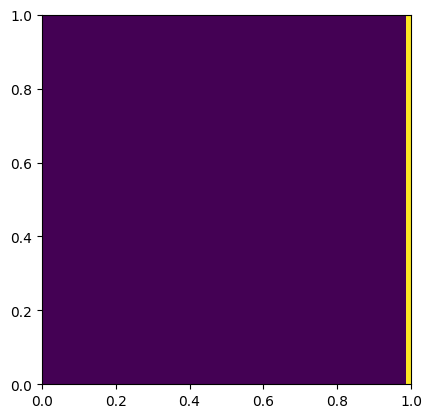

In [9]:
# show transpose and set origin='lower' for Cartesian convention  
pp.imshow(phi.T, origin='lower', extent=(0,1,0,1))

**Boundary conditions:**

$$\begin{eqnarray}\phi(x=0, y) &=& 0 \\
\phi(x, y=0) &=& 0 \\
\phi(x, y=1) &=& \sin(2 \pi x) \\
\phi(x=1, y) &=& -\sin(2 \pi y)\end{eqnarray}$$

In [10]:
dx = 1/n
xs = np.linspace(0.5*dx, 1-0.5*dx, n)

In [11]:
xs

array([0.0078125, 0.0234375, 0.0390625, 0.0546875, 0.0703125, 0.0859375,
       0.1015625, 0.1171875, 0.1328125, 0.1484375, 0.1640625, 0.1796875,
       0.1953125, 0.2109375, 0.2265625, 0.2421875, 0.2578125, 0.2734375,
       0.2890625, 0.3046875, 0.3203125, 0.3359375, 0.3515625, 0.3671875,
       0.3828125, 0.3984375, 0.4140625, 0.4296875, 0.4453125, 0.4609375,
       0.4765625, 0.4921875, 0.5078125, 0.5234375, 0.5390625, 0.5546875,
       0.5703125, 0.5859375, 0.6015625, 0.6171875, 0.6328125, 0.6484375,
       0.6640625, 0.6796875, 0.6953125, 0.7109375, 0.7265625, 0.7421875,
       0.7578125, 0.7734375, 0.7890625, 0.8046875, 0.8203125, 0.8359375,
       0.8515625, 0.8671875, 0.8828125, 0.8984375, 0.9140625, 0.9296875,
       0.9453125, 0.9609375, 0.9765625, 0.9921875])

In [12]:
for i in range(n):
    phi[i,-1] = math.sin(2 * math.pi * xs[i])

In [13]:
np.sin(2 * math.pi * xs)

array([ 0.04906767,  0.14673047,  0.24298018,  0.33688985,  0.42755509,
        0.51410274,  0.5956993 ,  0.67155895,  0.74095113,  0.80320753,
        0.85772861,  0.90398929,  0.94154407,  0.97003125,  0.98917651,
        0.99879546,  0.99879546,  0.98917651,  0.97003125,  0.94154407,
        0.90398929,  0.85772861,  0.80320753,  0.74095113,  0.67155895,
        0.5956993 ,  0.51410274,  0.42755509,  0.33688985,  0.24298018,
        0.14673047,  0.04906767, -0.04906767, -0.14673047, -0.24298018,
       -0.33688985, -0.42755509, -0.51410274, -0.5956993 , -0.67155895,
       -0.74095113, -0.80320753, -0.85772861, -0.90398929, -0.94154407,
       -0.97003125, -0.98917651, -0.99879546, -0.99879546, -0.98917651,
       -0.97003125, -0.94154407, -0.90398929, -0.85772861, -0.80320753,
       -0.74095113, -0.67155895, -0.5956993 , -0.51410274, -0.42755509,
       -0.33688985, -0.24298018, -0.14673047, -0.04906767])

In [14]:
phi[:,-1] = np.sin(2 * math.pi * xs)

In [15]:
phi[-1,:] = -np.sin(2 * math.pi * xs)

In [16]:
def initphi(n=64):
    dx = 1/n
    xs = np.linspace(0.5*dx, 1-0.5*dx, n)
    
    phi = np.zeros((n,n), 'd')
    
    phi[:,-1] = np.sin(2 * math.pi * xs)
    phi[-1,:] = -np.sin(2 * math.pi * xs)
    
    return phi

In [17]:
def showphi(array, colorbar=True):
    pp.imshow(array.T, origin='lower', extent=(0,1,0,1),
              vmin=-1, vmax=1, cmap='coolwarm')
    
    if colorbar:
        pp.colorbar()

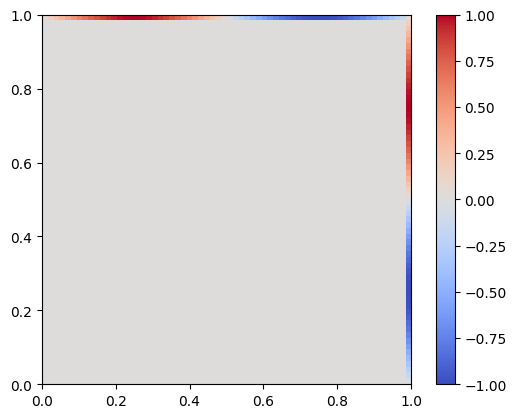

In [18]:
showphi(initphi())

In [19]:
def jacobi(array):
    # make a copy of the array to store new values
    updated = array.copy()
    
    # iterate only on the "bulk", using but not changing boundary values 
    for i in range(1, n-1):
        for j in range(1, n-1):
            updated[i,j] = (array[i-1,j] + array[i+1,j] + array[i,j-1] + array[i,j+1]) / 4
            
    return updated

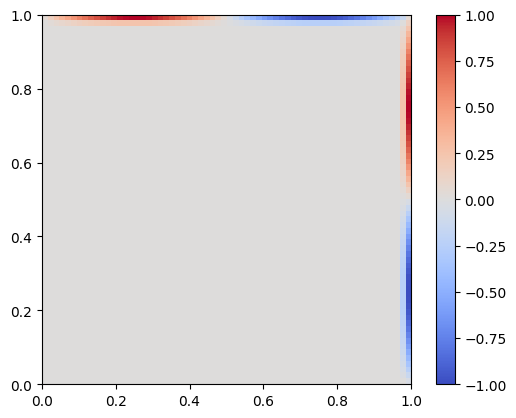

In [20]:
showphi(jacobi(phi))

In [21]:
%timeit jacobi(phi)

3.24 ms ± 310 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
phi[0:-2,1:-1] + phi[2:,1:-1]

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.14673047, -0.24298018, -0.33688985, ...,  0.33688985,
         0.24298018,  0.14673047]], shape=(62, 62))

In [23]:
def matrixjacobi(array):
    updated = array.copy()
    
    updated[1:-1,1:-1] = (array[0:-2,1:-1] + array[2:,1:-1] + array[1:-1,0:-2] + array[1:-1,2:]) / 4
    
    return updated

In [24]:
%timeit matrixjacobi(phi)

20.8 μs ± 2.81 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [25]:
def residual(array):
    laplace = array[0:-2,1:-1] + array[2:,1:-1] + array[1:-1,0:-2] + array[1:-1,2:] - 4*array[1:-1,1:-1]
    return np.mean(np.abs(laplace))

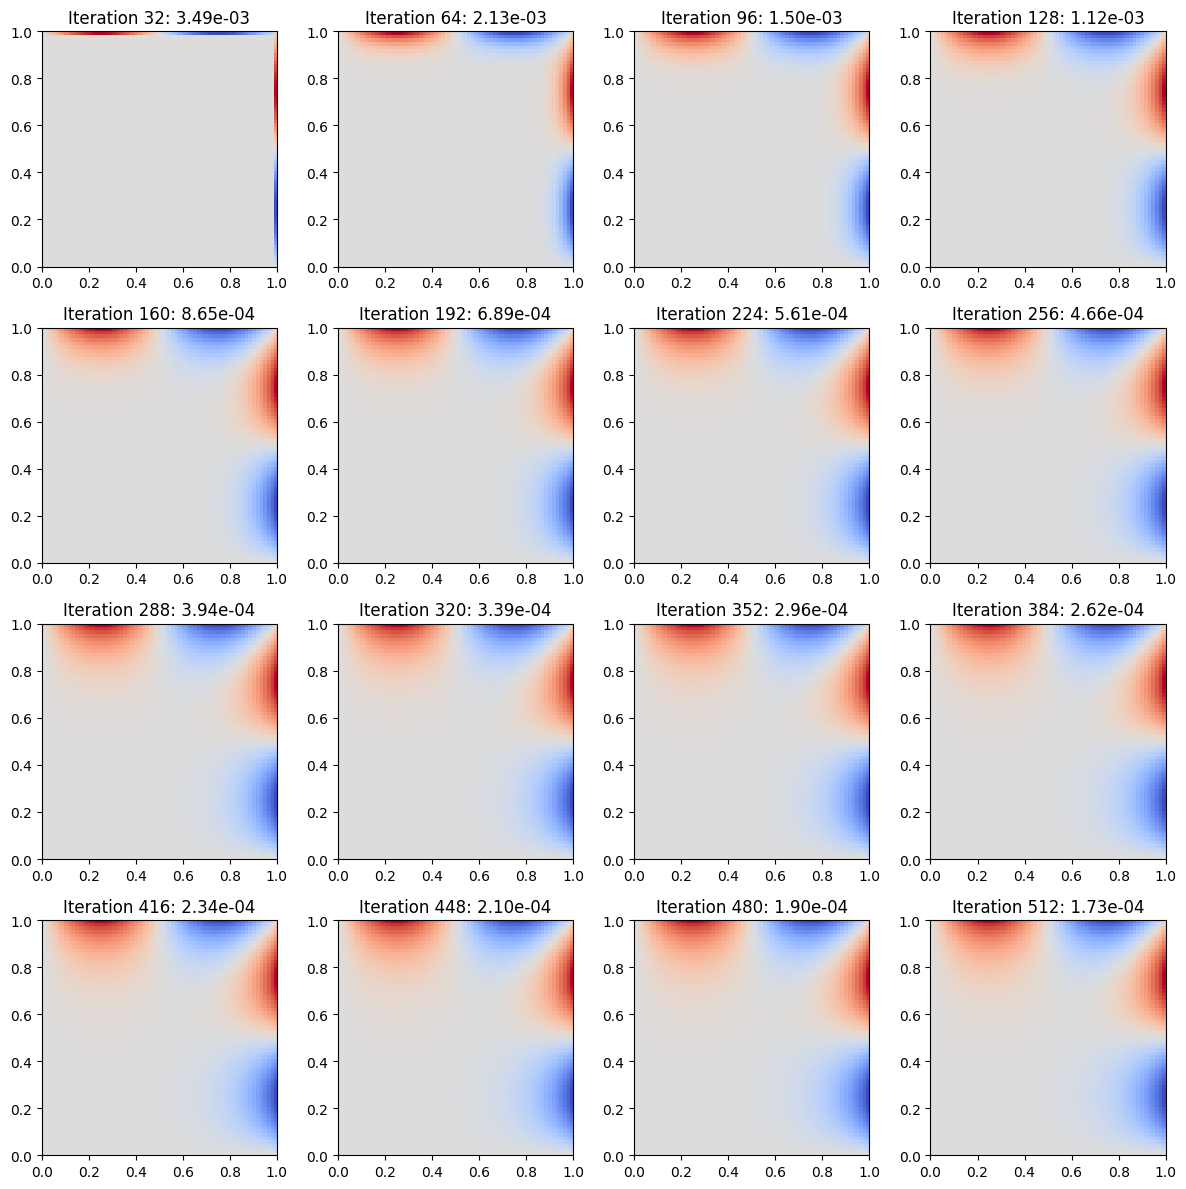

In [26]:
pp.figure(figsize=(12,12))

phi = initphi(64)

# loop from 1 to 16 (subplot indexes from one)
for i in range(1, 1+16):
    pp.subplot(4, 4, i)
    showphi(phi, colorbar=False)
        
    for j in range(32):
        phi = matrixjacobi(phi)
    
    meanres = residual(phi)
    pp.title(f'Iteration {i*32}: {meanres:.2e}')
    
# save space among subplots
pp.tight_layout()